___

#### DS7333 Quantifying the World: Case Study 1
#### DJ Dawkins, Nathan Deinlein, Joseph Lazarus, and Puri Rudick
___


Things to do 

**Assumption Check**<br />
**L1  + L2**<br />
**Feature importance**<br />
**Random Forest feature importance**<br />

___
The goal for this case study is to build a linear regression model using L1 or L2 regularization (or both) the task to predict the Critical Temperature at which the feature, 'Material' Super Conducts. In addition, we will evaluate which variable carries the most importance.
___
<a id="main"></a>
The approach for this Notebook will cover the following topics: <br />
1) **Imports and Data Prep**
<br />
2) <a  href="#EDA">EDA  </a>: check missing values, impute as needed, visualizations and summary statistics, outliers, multicollinearity
<br />
3) <a href="#Prep">Prepare Data  </a> : Set aside 10% of data as validation set. Employ 10-fold CV for training the Liniear Regression model.
<br />
4) <a href="#resids">Residual check  </a> : on regression models
<br />
5) <a href="#LR">Linear Regression </a> ,Using L1, L2 models: compare error metrics and feature importance
<br />
6) **Run tuned models** on validation set and compare metrics to evaluate overfitting  
<br />

<a id="prep"></a>
___
# Data Preparation
___
Cleaning raw data and new feature creation

- Imports
- load data
 - Data Quality using Pandas_Profiling  
> - Check missing values
> - check for duplicates

In [2]:
# Imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)

In [3]:
#load data from Github
train = pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%201/Data/train.csv")
train.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,775.425,1010.268571,718.152900,938.016780,1.305967,0.791488,810.6,735.985714,323.811808,355.562967,160.25,105.514286,136.126003,84.528423,1.259244,1.207040,205,42.914286,75.237540,69.235569,4654.35725,2961.502286,724.953211,53.543811,1.033129,0.814598,8958.571,1579.583429,3306.162897,3572.596624,81.8375,111.727143,60.123179,99.414682,1.159687,0.787382,127.05,80.987143,51.433712,42.558396,6.9055,3.846857,3.479475,1.040986,1.088575,0.994998,12.878,1.744571,4.599064,4.666920,107.756645,61.015189,7.062488,0.621979,0.308148,0.262848,399.97342,57.127669,168.854244,138.517163,2.25,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,766.440,1010.612857,720.605511,938.745413,1.544145,0.807078,810.6,743.164286,290.183029,354.963511,161.20,104.971429,141.465215,84.370167,1.508328,1.204115,205,50.571429,67.321319,68.008817,5821.48580,3021.016571,1237.095080,54.095718,1.314442,0.914802,10488.571,1667.383429,3767.403176,3632.649185,90.8900,112.316429,69.833315,101.166398,1.427997,0.838666,127.05,81.207857,49.438167,41.667621,7.7844,3.796857,4.403790,1.035251,1.374977,1.073094,12.878,1.595714,4.473363,4.603000,172.205316,61.372331,16.064228,0.619735,0.847404,0.567706,429.97342,51.413383,198.554600,139.630922,2.00,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,775.425,1010.820000,718.152900,939.009036,1.305967,0.773620,810.6,743.164286,323.811808,354.804183,160.25,104.685714,136.126003,84.214573,1.259244,1.132547,205,49.314286,75.237540,67.797712,4654.35725,2999.159429,724.953211,53.974022,1.033129,0.760305,8958.571,1667.383429,3306.162897,3592.019281,81.8375,112.213571,60.123179,101.082152,1.159687,0.786007,127.05,81.207857,51.433712,41.639878,6.9055,3.822571,3.479475,1.037439,1.088575,0.927479,12.878,1.757143,4.599064,4.649635,107.756645,60.943760,7.062488,0.619095,0.308148,0.250477,399.97342,57.127669,168.854244,138.540613,2.25,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,775.425,1

In [4]:
# Load data set called  unique_m from github 
unique_m=pd.read_csv("https://raw.githubusercontent.com/JosephLazarus/QTW/main/Case%20Study%201/Data/unique_m.csv")

unique_m.head()

,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.20,1.80,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.10,1.90,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.15,1.85,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.30,1.70,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [5]:
#Join the two datasets

#delete duplicated column
del train['critical_temp']

#create list of column names
train_cols = train.columns.values.tolist()
unique_cols = unique_m.columns.values.tolist() 
col_list = train_cols + unique_cols

df = pd.concat([train, unique_m], axis = 1, ignore_index=True)
df.columns = col_list

In [6]:
#check shape
df.shape

(21263, 169)

In [7]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [8]:
#only needed to run this cell once

#df.to_csv('full_df.csv', index = None, header=True)

___

#### IDK why but profiler isn't working for me. I'll have to do things the old fashion way
___

In [9]:
# profile = ProfileReport(df, title="Pandas Profiling Report")

In [10]:
# profile

___
#### Old fashioned EDA <a id="EDA"></a>
___

In [11]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,He,Li,Be,B,C,N,O,F,Ne,Na,Mg,Al,Si,P,S,Cl,Ar,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.0,21263.0,21263.0,21263.000000
mean,4.11522

In [12]:
# What is the mean Critical Temp 

df["critical_temp"].mean()

34.42121913535249

## Columns with all zeros:
While there were no missing values observed, the summary stats show that some columns have all zeros and are essentially blank and could be removed

In [13]:
# some of these columns (9) of them are just zeros. Removing these columns

# IDK why this line doesn't work for me either

#  df.loc[:, (df != 0).any(axis=0)]

In [14]:
max = df.max().to_frame()
max.rename(columns={ max.columns[0]: "Max" }, inplace = True)

min = df.min().to_frame()
min.rename(columns={ min.columns[0]: "Min" }, inplace = True)

minmax = pd.concat([min,max], axis=1)
#minmax.head(100)

minmax0 = minmax[(minmax['Min'] == 0) & (minmax['Max'] == 0)]
#minmax0.head(100)

all_zeros = minmax0.index.tolist()
print(all_zeros)


['He', 'Ne', 'Ar', 'Kr', 'Xe', 'Pm', 'Po', 'At', 'Rn']


## Remove empty columns

In [15]:
print("Before dropping: ",df.shape)
df = df.drop(all_zeros, axis=1)
print("After dropping: ",df.shape)


Before dropping:  (21263, 169)
After dropping:  (21263, 160)


## Check for Duplicate Data

In [16]:
# Check for duplicate rows
print('Duplicate rows: ',df.duplicated(keep='first').sum())


Duplicate rows:  0


There are not exact duplicate rows, but below shows that there are duplicate entries for materials


In [17]:
materials_count = pd.DataFrame(df.groupby('material').size())
materials_count.rename(columns={ materials_count.columns[0]: "Count" }, inplace = True)


materials_count.sort_values('Count', ascending = False).head(20)

,Count
material,
Y1Ba2Cu3O7,110
Bi2Sr2Ca1Cu2O8,80
La1.85Sr0.15Cu1O4,51
B2Mg1,46
Tl2Ba2Cu1O6,45
Bi2Sr2Ca1Cu2O,44
Y1Ba2Cu3O,44
Y1Ba2Cu4O8,40
Nd1.85Ce0.15Cu1O4,32


In [18]:
abs(df.corr()['critical_temp']).sort_values(key=abs, ascending=False)

critical_temp                      1.000000
wtd_std_ThermalConductivity        0.721271
range_ThermalConductivity          0.687654
range_atomic_radius                0.653759
std_ThermalConductivity            0.653632
wtd_mean_Valence                   0.632401
wtd_entropy_atomic_mass            0.626930
wtd_gmean_Valence                  0.615653
wtd_entropy_atomic_radius          0.603494
number_of_elements                 0.601069
range_fie                          0.600790
mean_Valence                       0.600085
wtd_std_atomic_radius              0.599199
entropy_Valence                    0.598591
wtd_entropy_Valence                0.589664
wtd_std_fie                        0.582013
gmean_Valence                      0.573068
entropy_fie                        0.567817
O                                  0.566852
wtd_entropy_FusionHeat             0.563244
std_atomic_radius                  0.559629
entropy_atomic_radius              0.558937
Ba                              

<AxesSubplot:xlabel='wtd_std_ThermalConductivity', ylabel='critical_temp'>

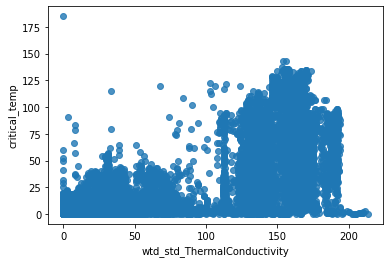

In [19]:
# visualise area-price relationship
sns.regplot(x="wtd_std_ThermalConductivity", y="critical_temp", data=df, fit_reg=False)

In [20]:
highcorr = ['critical_temp', 'wtd_std_ThermalConductivity', 'range_ThermalConductivity', 'range_atomic_radius', 'std_ThermalConductivity','wtd_mean_Valence', 'wtd_entropy_atomic_mass', 'wtd_gmean_Valence', 'wtd_entropy_atomic_radius', 'number_of_elements', 'range_fie']
df[highcorr].describe()

,critical_temp,wtd_std_ThermalConductivity,range_ThermalConductivity,range_atomic_radius,std_ThermalConductivity,wtd_mean_Valence,wtd_entropy_atomic_mass,wtd_gmean_Valence,wtd_entropy_atomic_radius,number_of_elements,range_fie
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,34.421219,96.234051,250.893443,139.325025,98.943993,3.153127,1.063884,3.055885,1.131138,4.115224,572.222612
std,34.254362,63.710355,158.703557,67.272228,60.143272,1.191249,0.401423,1.174815,0.407159,1.439295,309.614442
min,0.000210,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,5.365000,31.985437,86.382000,80.000000,37.933172,2.116732,0.775363,2.091251,0.852181,3.000000,262.400000
50%,20.000000,113.556983,399.795000,171.000000,135.762089,2.618182,1.146783,2.434057,1.242878,4.000000,764.100000
75%,63.000000,162.711144,399.973420,205.000000,153.806272,4.026201,1.359418,3.914868,1.425684,5.000000,810.600000
max,185.000000,213.300452,429.974170,256.000000,214.986150,7.000000,1.958203,7.000000,1.903748,9.000000,1304.500000


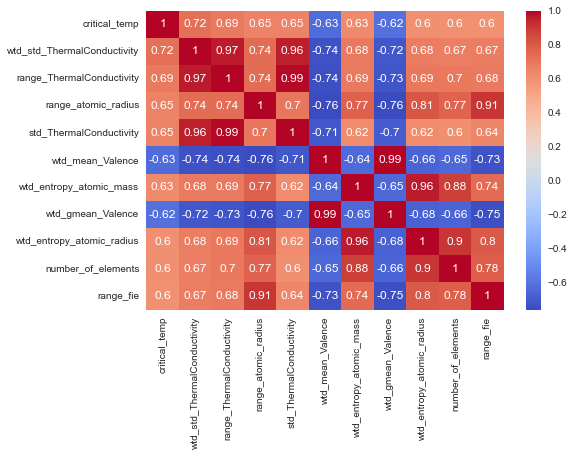

In [67]:
df_highcorr = df[highcorr]

corrMatrix = df_highcorr.corr()
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm")
plt.show()

In [22]:
#sns.heatmap(df.corr(),annot=True,cmap='viridis')

___
#### Distribution of Critical Temp

Normal distrbution of residuals is needed for Linear Regression not that critical temperature needs to come from a normal dsitrubtion. Because we can envoke the CLT in our case given the number of observations
___
Looking at those correlations plots got me thinking about doing an assumption check. 

I wonder if the response is normally distrubuted.

((array([-3.99316766, -3.77774718, -3.65990182, ...,  3.65990182,
          3.77774718,  3.99316766]),
  array([2.10e-04, 3.25e-04, 4.00e-04, ..., 1.43e+02, 1.43e+02, 1.85e+02])),
 (31.63755377650954, 34.4212191353525, 0.9234614097220073))

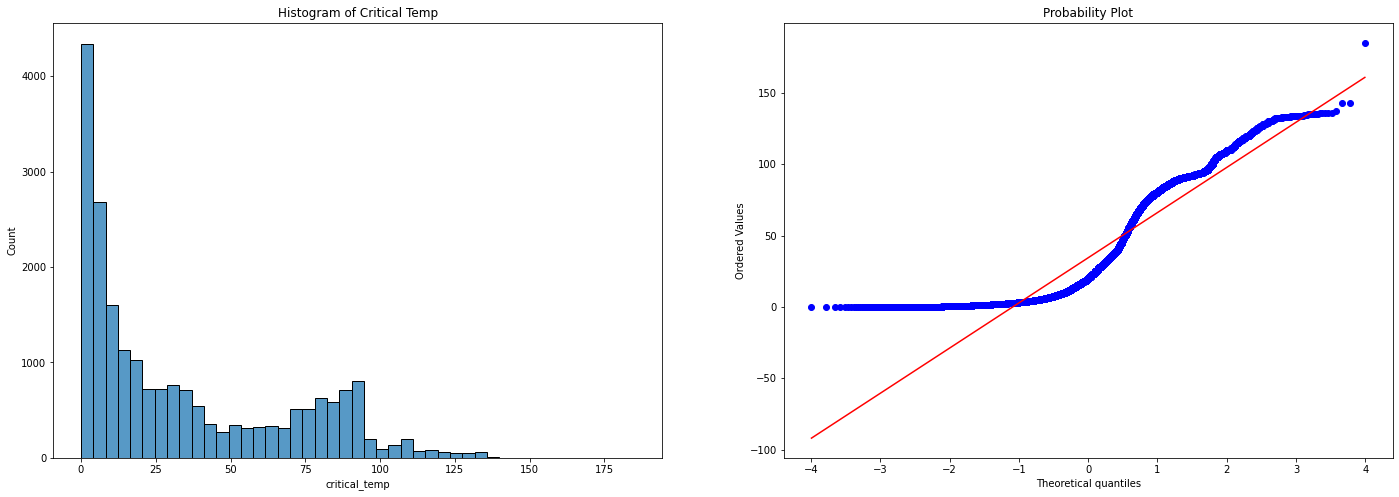

In [23]:
import scipy.stats as stats
fig, ax = plt.subplots(1,2, figsize=(24,8))

sns.histplot(df['critical_temp'], ax=ax[0]).set(title='Histogram of Critical Temp')
stats.probplot(df['critical_temp'], dist="norm", plot=ax[1])


((array([-3.99316766, -3.77774718, -3.65990182, ...,  3.65990182,
          3.77774718,  3.99316766]),
  array([-8.46840303, -8.03168538, -7.82404601, ...,  4.96284463,
          4.96284463,  5.22035583])),
 (1.515811084445478, 2.7360290954307422, 0.9610850065987543))

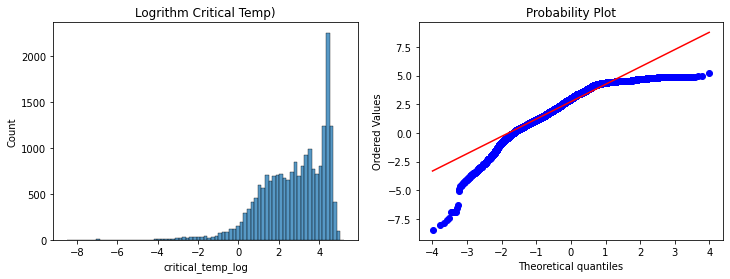

In [24]:
df['critical_temp_log'] = np.log(df['critical_temp'])

fig, ax = plt.subplots(1,2, figsize=(12,4))

sns.histplot(df['critical_temp_log'], ax=ax[0]).set(title='Logrithm Critical Temp)')
stats.probplot(df['critical_temp_log'], dist="norm", plot=ax[1])

In [25]:
#Split Modeling and Validation Datasets
from sklearn.model_selection import train_test_split

#removing material from dataset
df.drop(columns = ['material'],axis = 1, inplace =True)

train, val = train_test_split(df, test_size=0.1, shuffle=True, random_state=42)
print("Size of modeling set (to be CV split): ",train.shape)
print("Size of hold back validation set: ",val.shape)

Size of modeling set (to be CV split):  (19136, 160)
Size of hold back validation set:  (2127, 160)


In [26]:
#Create X and Y for modeling
Xtrain = train.drop(['critical_temp', 'critical_temp_log'],axis=1) #droping target
y = train['critical_temp']
y_log = train['critical_temp_log']

#Create X and Y for validation
Xval = val.drop(['critical_temp', 'critical_temp_log'],axis=1) #droping target
yval = val['critical_temp']
yval_log = val['critical_temp_log']

In [27]:
#Standard scale the data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = Xtrain.columns
d = scaler.fit_transform(Xtrain)
X_scaled = pd.DataFrame(d, columns=names)
X_scaled.head()

scaler = preprocessing.MinMaxScaler()
names = Xval.columns
d = scaler.fit_transform(Xval)
Xval_scaled = pd.DataFrame(d, columns=names)
Xval_scaled.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi
0,0.142857,0.367631,0.391393,0.375155,0.398578,0.364936,0.273996,0.102695,0.254017,0.104707,0.097688,0.278411,0.235067,0.300745,0.238240,0.339674,0.321280,0.076417,0.290994,0.106019,0.100259,0.508065,0.606183,0.485599,0.599787,0.331263,0.253356,0.292,0.600481,0.316017,0.351966,0.277593,0.332552,0.298414,0.336788,0.368155,0.279251,0.143745,0.229081,0.154545,0.139645,0.496610,0.366140,0.491797,0.387004,0.385123,0.373515,0.094269,0.165005,0.106947,0.084259,0.274626,0.262649,0.273602,0.263016,0.362339,0.341214,0.047720,0.118335,0.048586,0.042175,0.179229,0.150930,0.185463,0.180768,0.423361,0.416383,0.013954,0.070906,0.014388,0.012461,0.60,0.581860,0.603554,0.602769,0.335637,0.267354,0.166667,0.393369,0.190500,0.199155,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.055556,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.428571,0.335722,0.359172,0.262095,0.303488,0.638476,0.595869,0.614496,0.182175,0.452606,0.451866,0.387753,0.299364,0.346310,0.258875,0.646553,0.699042,0.642568,0.218809,0.685698,0.613592,0.524194,0.562212,0.387100,0.478235,0.623774,0.639959,0.820,0.335084,0.671219,0.756170,0.152297,0.230083,0.028590,0.078720,0.561655,0.494149,0.396598,0.172585,0.304135,0.325373,0.366768,0.307041,0.252734,0.227703,0.625378,0.571994,0.364040,0.217864,0.356474,0.311400,0.072255,0.085476,0.032537,0.055003,0.584416,0.558132,0.122907,0.054371,0.096165,0.084925,0.342302,0.487495,0.024402,0.086622,0.205794,0.144115,0.930228,0.476670,0.807199,0.918348,0.15,0.097198,0.157731,0.146247,0.668831,0.680278,0.166667,0.081739,0.164978,0.160942,0.0,0.0,0.0,0.0,0.0,0.0,0.029197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.00,0.2,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.571429,0.398757,0.205827,0.316681,0.137243,0.769564,0.820036,0

## **Cross Validation**
Cross validation is performed using repeated holdout via KFold()

- 3 folds are used
- A random seed is set so the same random test and training splits are used each time cross validation is performed.

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

cv_method = KFold(n_splits=5, shuffle=False)


> 
> ## Modeling and Evaluation:

Three regression models were conducted using GridSearchCV to find the best regression model that fit the modeling dataset.
1) Linear Regression
2) LASSO Regression
3) Ridge Regression




In [29]:
#Create function for regression models
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(modelNme, regEstimator, X, y, x_valid, y_valid, cv):
    
    print('Parameterization of the best estimator:',regEstimator,'\n')

    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    yhat = regEstimator.predict(x_valid)

    #cross val score sign-flips the outputs of MAE
    # https://github.com/scikit-learn/scikit-learn/issues/2439
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean RMSE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))

    #print R2 for all folds 
    R2avg = scores['test_R2'].mean()
    print_str = "The average R2 for all cv folds is: \t\t\t {R2avg:.5}"
    print(print_str.format(R2avg=R2avg))
    print('---------------------------------------------------------------------')

    model_stat = pd.DataFrame()
    model_stat['Model_name'] = [str(modelNme)]
    model_stat['MAE_model'] = scores['test_MAE'].mean()
    model_stat['MAPE_model'] = scores['test_MAPE'].mean()
    model_stat['RMSE_model'] = scores['test_RMSE'].mean()
    model_stat['R2_model'] = scores['test_R2'].mean()
    model_stat['MAE_validation'] = mean_absolute_error(y_valid, yhat)
    model_stat['MAPE_validation'] = mape(y_valid, yhat)
    model_stat['RMSE_validation'] = rmse(y_valid, yhat)
    model_stat['R2_validation'] = r2_score(y_valid, yhat)

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    scoresResults['R2'] = scores['test_R2']
    print(scoresResults)
    
    return model_stat, model_stat['MAE_validation']

In [30]:
#Create Function for Prediction Error, Residual and Cook's D Plots
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import CooksDistance

def residualPlot(model, x_train, y_train, x_test, y_test):
    print('\n*********************************************\nPrediction Error, Residual and Cook\'s D Plots\n*********************************************')

    predictions = model.predict(x_train)
    residuals = y_train - predictions
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(residuals))

    plt.subplots(1, 2, figsize=(14, 4))
    plt.subplot(121)
    visualizer = PredictionError(model)
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.finalize()

    plt.subplot(122)
    visualizer = ResidualsPlot(model, hist=False, qqplot=True)
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    plt.show()

    plt.subplots(1, 2, figsize=(13,4))    
    plt.subplot(121)
    sns.regplot(predictions, model_norm_residuals_abs_sqrt,
                scatter=True,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plt.ylabel("Standarized residuals")
    plt.xlabel("Fitted value")

    y = np.array(y_train, dtype=float)
    x = np.array(x_train, dtype=float)
    plt.subplot(122)
    visualizer = CooksDistance()
    visualizer.fit(x, y)
    visualizer.show()

In [31]:
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, r2_score

def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)
r2_scorer = make_scorer(score_func=r2_score, greater_is_better=True)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE': mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer,
                'R2': r2_scorer
               } 

### Create Dataframe to collect all regression model scores

In [32]:
#Create dataframe to collect regression models stat
regModel_stat = pd.DataFrame()

### OLS Regression

In [33]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [34]:
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import math

linreg = LinearRegression()
parameters = {'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_method # KFolds = 10
                   , scoring='neg_mean_squared_error')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_scaled, y)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LinearRegression(),
             param_grid={'fit_intercept': (True, False)},
             scoring='neg_mean_squared_error', verbose=1)

### Run tuned model on the train dataset and check performance of the model on validation set


Parameterization of the best estimator: LinearRegression(fit_intercept=False) 

The average MAE for all cv folds is: 			 12.716
The average MAE percentage (MAPE) for all cv folds is: 	 1465.9
The average RMSE for all cv folds is: 			 24.795
The average R2 for all cv folds is: 			 0.37361
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
         MAE         MAPE       RMSE        R2
0  12.601053  1382.627786  17.037329  0.752293
1  12.346569  2032.613668  16.574153  0.766375
2  13.045251  2038.630543  42.645680 -0.626041
3  13.025667  1536.295177  30.924926  0.210197
4  12.562890   339.397519  16.793913  0.765219


/var/folders/vz/68jlc85d78vcqcr5gx1r56l40000gn/T/ipykernel_56763/1925570515.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regModel_stat = regModel_stat.append(l)
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



*********************************************
Prediction Error, Residual and Cook's D Plots
*********************************************


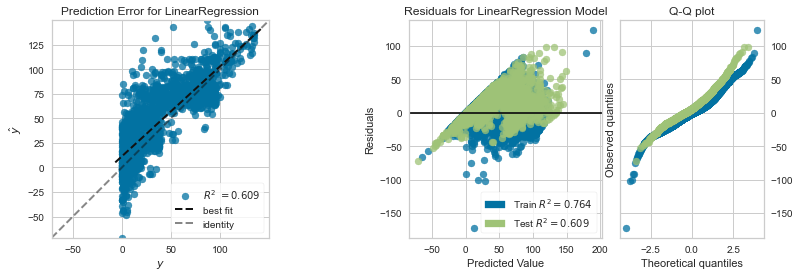

/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


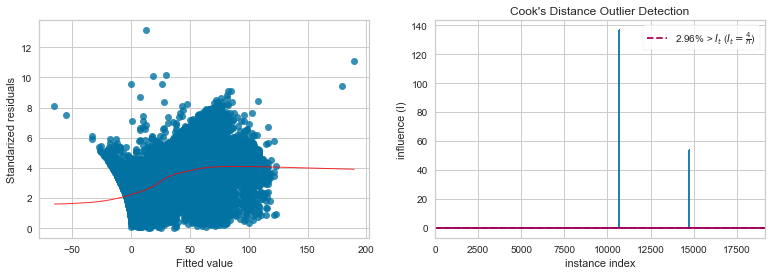

In [35]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
l, linMae = EvaluateRegressionEstimator('Linear Regression', regEstimator,  X_scaled, y, Xval_scaled, yval, cv_method)
regModel_stat = regModel_stat.append(l)

#Plot rediction Error, Residual and Cook's D
residualPlot(regEstimator, X_scaled, y, Xval_scaled, yval)

### Hyperparameter Tuning Using Grid Search Cross-Validation
A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation.

In [36]:
# number of features in X_train
len(X_scaled.columns)

158

In [37]:
# step-1: create a cross-validation scheme
# Shuffle or to not. 
# according to documentation : Shuffle = TRUE shuffles the data before splitting into batches. 
#Note that the samples within each split will not be shuffled.
folds = KFold(n_splits = 5, shuffle = False)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(0, 158))}]


# step-3: perform grid search
# 3.1 specify model  rfe = recursive feature elimination
lm = LinearRegression()
lm.fit(X_scaled, y)
rfe = RFE(lm)             

# 3.2 call GridSearchCV() rfe = recursive feature elimination
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      





### To reduce runtime of notebook I # commented out model_cv.fit

In [38]:
# fit the model
# model_cv.fit(X_scaled, y)  

# print(f'Coefficients: {model_cv.coef_}')
# print(f'Intercept: {model_cv.intercept_}')
# print(f'R^2 score: {model_cv.score(X_scaled, y)}')

In [39]:
# # cv results
# cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results

In [40]:
# # plotting cv results
# plt.figure(figsize=(16,6))

# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
# plt.xlabel('number of features')
# plt.ylabel('neg_mean_squared_error')
# plt.title("Optimal Number of Features")
# plt.legend(['test score', 'train score'], loc='upper left')

In [41]:
# import statsmodels.stats.api as sms
# sns.set_style('darkgrid')
# sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)
# def linearity_test(model, y):
#     '''
#     Function for visually inspecting the assumption of linearity in a linear regression model.
#     It plots observed vs. predicted values and residuals vs. predicted values.
    
#     Args:
#     * model - fitted OLS model from statsmodels
#     * y - observed values
#     '''
#     fitted_vals = model.predict()
#     resids = model.resid

#     fig, ax = plt.subplots(1,2)
    
#     sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
#     ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
#     ax[0].set(xlabel='Predicted', ylabel='Observed')

#     sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
#     ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
#     ax[1].set(xlabel='Predicted', ylabel='Residuals')

In [42]:
# linearity_test(lm, y_scaled)

### L1 Lasso

<a id="LR"></a>

In [43]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso

LassoReg = Lasso(fit_intercept=True, copy_X=True
                ,max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
LassoAlpha = [0.001, 0.01, 0.1, 0.5, 1]
LassoParameters = {'alpha': LassoAlpha}

#Create a grid search object using the parameters above
LassoGridSearch = GridSearchCV(estimator=LassoReg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=LassoParameters
                   , cv=cv_method # KFolds = 10
                   , scoring='neg_mean_absolute_error')

#Perform hyperparameter search to find the best combination of parameters for our data
LassoGridSearch.fit(X_scaled, y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+06, tolerance: 1.802e+03
  model = cd_fast.enet_coordinate_descent(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.798e+05, tolerance: 1.787e+03
  model = cd_fast.enet_coordinate_descent(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Lasso(random_state=0), n_jobs=8,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_absolute_error', verbose=1)

In [44]:
print("Best Parameters from search: ",LassoGridSearch.best_estimator_.get_params())

Best Parameters from search:  {'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': 0, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


Text(0, 0.5, 'MAE')

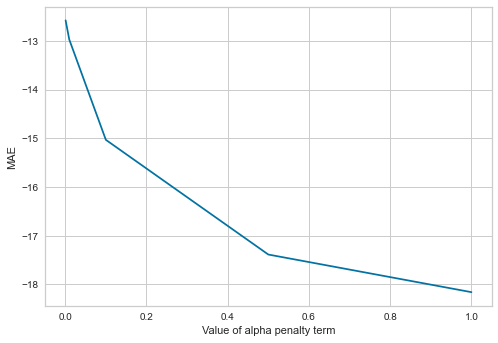

In [45]:
plt.plot(LassoAlpha, LassoGridSearch.cv_results_['mean_test_score'])
plt.xlabel('Value of alpha penalty term')
plt.ylabel('MAE')

Parameterization of the best estimator: Lasso(alpha=0.001, random_state=0) 



/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+06, tolerance: 1.802e+03
  model = cd_fast.enet_coordinate_descent(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.662e+05, tolerance: 1.801e+03
  model = cd_fast.enet_coordinate_descent(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or co

The average MAE for all cv folds is: 			 12.582
The average MAE percentage (MAPE) for all cv folds is: 	 1299.1
The average RMSE for all cv folds is: 			 17.786
The average R2 for all cv folds is: 			 0.72644
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
         MAE         MAPE       RMSE        R2
0  12.574778  1121.773130  17.031935  0.752450
1  12.398858  1848.813208  16.664537  0.763820
2  12.683535  2144.305784  21.408328  0.590224
3  12.627049  1058.558578  17.000839  0.761306
4  12.624428   322.251461  16.822356  0.764423

*********************************************
Prediction Error, Residual and Cook's D Plots
*********************************************


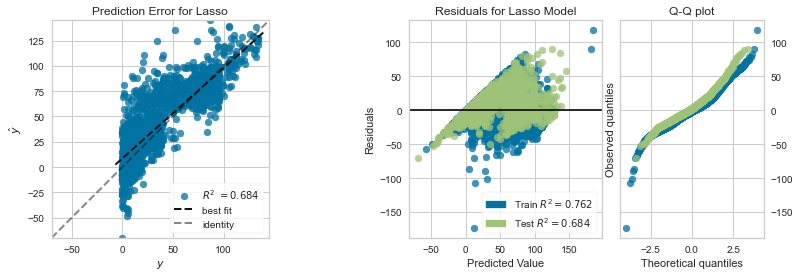

/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


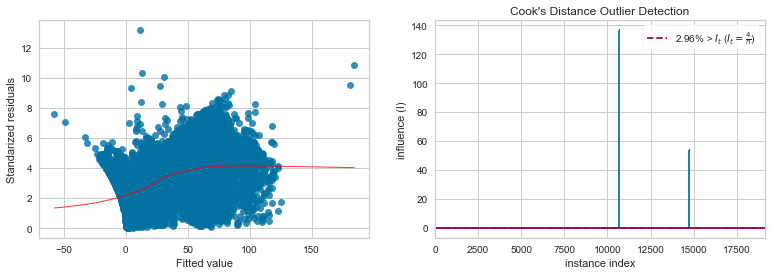

In [46]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
LassoEstimator = LassoGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
L1, LassoMae = EvaluateRegressionEstimator('LASSO Regression', LassoEstimator, X_scaled, y, Xval_scaled, yval, cv_method)
regModel_stat = regModel_stat.append(L1)

#Plot rediction Error, Residual and Cook's D
residualPlot(LassoEstimator, X_scaled, y, Xval_scaled, yval)

In [47]:
L1_weights = pd.DataFrame(X_scaled.columns)
L1_weights['weight'] = LassoEstimator.coef_

L1_weights.sort_values('weight', key=abs, ascending = False).head(200)

,0,weight
131,Ba,196.459148
62,wtd_mean_ThermalConductivity,192.212646
49,std_ElectronAffinity,175.095092
92,Si,-136.963690
44,wtd_gmean_ElectronAffinity,-123.470777
47,range_ElectronAffinity,-113.558092
64,wtd_gmean_ThermalConductivity,-112.343907
2,wtd_mean_atomic_mass,-108.731305
15,entropy_fie,94.225643
42,wtd_mean_ElectronAffinity,93.761336


## L2 Ridge Regression

In [48]:
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Ridge

ridgeReg = Ridge(fit_intercept=True, copy_X=True
                ,max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
ridgeAlpha = [0.001, 0.01, 0.1, 0.5, 1, 5,10, 20, 50, 100, 200, 300]
ridgeParameters = {'alpha': ridgeAlpha}

#Create a grid search object using the parameters above
ridgeGridSearch = GridSearchCV(estimator=ridgeReg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=ridgeParameters
                   , cv=cv_method # KFolds = 5
                   , scoring='neg_mean_absolute_error')

#Perform hyperparameter search to find the best combination of parameters for our data
ridgeGridSearch.fit(X_scaled, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Ridge(max_iter=1000, random_state=0, tol=0.0001),
             n_jobs=8,
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100,
                                   200, 300]},
             scoring='neg_mean_absolute_error', verbose=1)

Parameterization of the best estimator: Ridge(alpha=0.1, max_iter=1000, random_state=0, tol=0.0001) 

The average MAE for all cv folds is: 			 12.54
The average MAE percentage (MAPE) for all cv folds is: 	 1399.5
The average RMSE for all cv folds is: 			 16.944
The average R2 for all cv folds is: 			 0.75548
---------------------------------------------------------------------
Cross Validation Fold Mean Error Scores
         MAE         MAPE       RMSE        R2
0  12.567840  1236.260179  17.030024  0.752506
1  12.361988  1895.345695  16.615768  0.765201
2  12.537436  2195.398484  17.240849  0.734234
3  12.630147  1339.774893  17.030746  0.760465
4  12.600354   330.953047  16.801401  0.765010

*********************************************
Prediction Error, Residual and Cook's D Plots
*********************************************


/var/folders/vz/68jlc85d78vcqcr5gx1r56l40000gn/T/ipykernel_56763/2014082035.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regModel_stat = regModel_stat.append(L2)
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


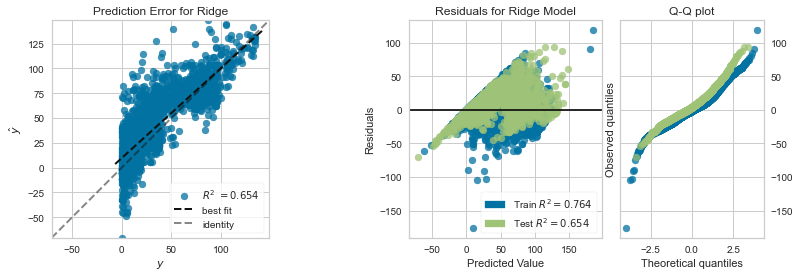

/Users/puri/opt/anaconda3/envs/pyri/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


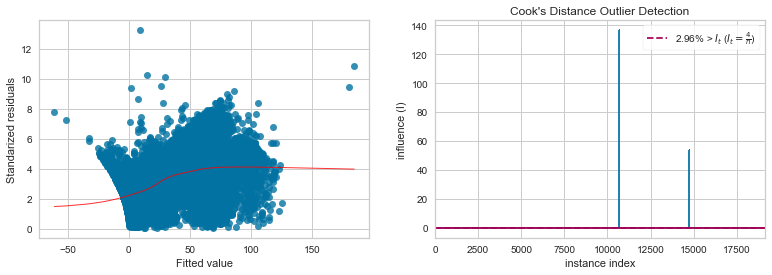

In [49]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
ridgeEstimator = ridgeGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
L2, ridgeMae = EvaluateRegressionEstimator('Ridge Regression', ridgeEstimator, X_scaled, y, Xval_scaled, yval, cv_method)
regModel_stat = regModel_stat.append(L2)

#Plot rediction Error, Residual and Cook's D
residualPlot(ridgeEstimator, X_scaled, y, Xval_scaled, yval)

In [50]:

L2_weights = pd.DataFrame(X_scaled.columns)
L2_weights['weight'] = ridgeEstimator.coef_

L2_weights.sort_values('weight', key=abs, ascending = False).head(50)

,0,weight
131,Ba,193.646694
62,wtd_mean_ThermalConductivity,192.768203
49,std_ElectronAffinity,182.176496
22,wtd_mean_atomic_radius,175.295798
2,wtd_mean_atomic_mass,-167.027968
44,wtd_gmean_ElectronAffinity,-138.378986
92,Si,-135.460347
1,mean_atomic_mass,119.149832
47,range_ElectronAffinity,-116.407956
52,wtd_mean_FusionHeat,-115.101851


**Ridge Yellow Brick Plot**
<a id="RidgeYB">

In [51]:
regModel_stat

,Model_name,MAE_model,MAPE_model,RMSE_model,R2_model,MAE_validation,MAPE_validation,RMSE_validation,R2_validation
0,Linear Regression,12.716286,1465.912939,24.795200,0.373609,15.486874,940.402605,21.187201,0.608565
0,LASSO Regression,12.581730,1299.140432,17.785599,0.726445,13.991783,855.967362,19.030190,0.684209
0,Ridge Regression,12.539553,1399.546460,16.943758,0.755483,14.539439,894.774805,19.920908,0.653956


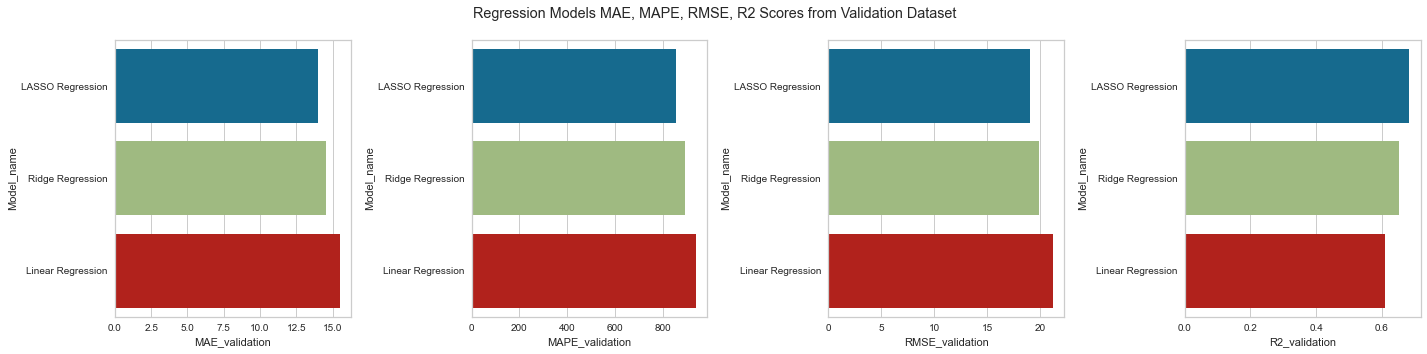

In [52]:
from heapq import nsmallest
from heapq import nlargest

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Regression Models MAE, MAPE, RMSE, R2 Scores from Validation Dataset')

mae_valid = np.array(regModel_stat.sort_values('MAE_validation').MAE_validation)
# top2_maevalid = max(nsmallest(2, mae_valid))
# clrs1 = ['grey' if (x > top2_maevalid) else 'red' for x in mae_valid]
sns.barplot(ax=axes[0], x="MAE_validation", y="Model_name", data=regModel_stat.sort_values('MAE_validation'))
# axes[0].set_xlim(.11,.145)

mape_valid = np.array(regModel_stat.sort_values('MAPE_validation').MAPE_validation)
# top2_mapevalid = max(nsmallest(2, mape_valid))
# clrs2 = ['grey' if (x > top2_mapevalid) else 'red' for x in mape_valid]
sns.barplot(ax=axes[1], x="MAPE_validation", y="Model_name", data=regModel_stat.sort_values('MAPE_validation'))
# axes[1].set_xlim(5,7.12)

rmse_valid = np.array(regModel_stat.sort_values('RMSE_validation').RMSE_validation)
# top2_rmsevalid = max(nsmallest(2, rmse_valid))
# clrs3 = ['grey' if (x > top2_rmsevalid) else 'red' for x in rmse_valid]
sns.barplot(ax=axes[2], x="RMSE_validation", y="Model_name", data=regModel_stat.sort_values('RMSE_validation'))
# axes[2].set_xlim(.15,.195)

r2_valid = np.array(regModel_stat.sort_values('R2_validation', ascending=False).R2_validation)
# top2_r2valid = min(nlargest(2, r2_valid))
# clrs4 = ['grey' if (x < top2_r2valid) else 'red' for x in r2_valid]
sns.barplot(ax=axes[3], x="R2_validation", y="Model_name", data=regModel_stat.sort_values('R2_validation', ascending=False))
# axes[3].set_xlim(.55,.72)

plt.tight_layout()

<AxesSubplot:xlabel='wtd_range_ThermalConductivity', ylabel='critical_temp'>

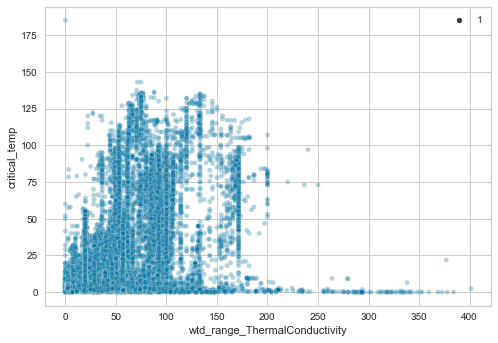

In [53]:
sns.scatterplot(data=df, x="wtd_range_ThermalConductivity", y="critical_temp", size=1, alpha=0.3)

<AxesSubplot:xlabel='mean_ThermalConductivity', ylabel='critical_temp'>

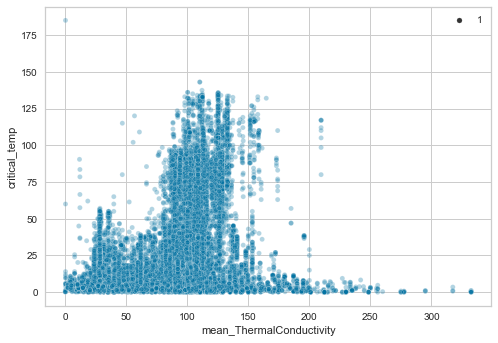

In [54]:
sns.scatterplot(data=df, x="mean_ThermalConductivity", y="critical_temp", size=1, alpha=0.3)

<AxesSubplot:xlabel='Ba', ylabel='critical_temp'>

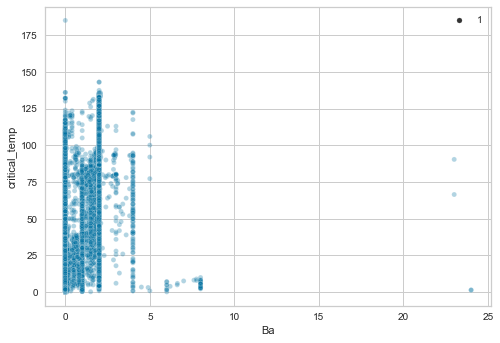

In [55]:
sns.scatterplot(data=df, x="Ba", y="critical_temp", size=1, alpha=0.3)

In [56]:
mean_ThermalConductivity = pd.DataFrame(df.groupby('mean_ThermalConductivity').mean())

In [57]:
mean_ThermalConductivity.sort_values('mean_ThermalConductivity', ascending = False).head(10)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,H,Li,Be,B,C,N,O,F,Na,Mg,Al,Si,P,S,Cl,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Cs,Ba,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,critical_temp,critical_temp_log
mean_ThermalConductivity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
332.5,2.0,67.424869,69.229065,53.948587,58.865122,0.500522,0.352099,80.886661,51.244553,40.443331,32.563452,653.850,657.269392,649.341667,653.962710,0.686260,0.506916,153.30,339.168228,76.650000,61.715704,141.50,142.548346,139.534942,141.101360,0.679292,0.495689,47.0,76.855631,23.500000,18.921318,6595.0,6768.757762,5321.935738,5790.894562,0.506850,0.356112,7790.0,4981.928517,3895.000000,3136.107841,85.550,87.403565,74.782351,79.235572,0.570065,0.398237,83.10,60.137450,41.55000,33.454501,11.000000,11.013383,10.995908,11.010403,0.692775,0.524904,0.600,5.211215,0.300000,0.241549,336.849520,317.883627,325.969502,0.649516,0.461925,195.0,201.736730,97.500000,78.503341,2.000000,1.955390,1.732051,1.768038,0.562335,0.530460,2.0,0.928221,1.000000,0.805162,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.573625,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838875,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.359750,-1.542783
317.5,2.0,45.263769,41.121390,41.407353,37.667843,0.609201,0.663310,36.564461,8.026388,18.282231,17.556390,661.100,642.089978,655.754527,637.201342,0.685072,0.673787,167.80,121.825054,83.900000,80.569003,131.50,128.441176,130.805199,127.804638,0.687868,0.671025,27.0,25.295207,13.500000,12.964023,5830.0,5120.806100,4918.536368,4313.882120,0.541156,0.622922,6260.0,1809.041394,3130.000000,3005.732756,81.950,73.351307,72.633326,65.048985,0.581717,0.648835,75.90,19.381808,37.95000,36.443309,11.900000,11.628105,11.839341,11.572525,0.688054,0.670797,2.400,2.296296,1.200000,1.152358,298.807190,306.594194,288.930499,0.658998,0.679173,165.0,44.438998,82.500000,79.224585,2.500000,2.613290,2.449490,2.565976,0.673012,0.597186,1.0,1.066449,0.500000,0.480149,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.686667,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.00000,0.0,0.

<AxesSubplot:xlabel='mean_ThermalConductivity', ylabel='critical_temp'>

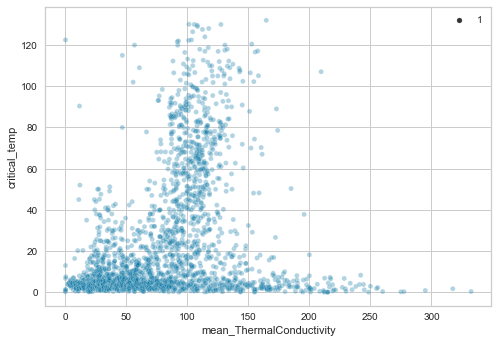

In [58]:
sns.scatterplot(data=mean_ThermalConductivity, x="mean_ThermalConductivity", y="critical_temp", size=1, alpha=0.3)